In [1]:
import numpy as np
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.io import fits
import matplotlib.pyplot as plt
import lightkurve as lk
import astropy.units as u
import astropy.constants as c
from astropy.timeseries import LombScargle
from astropy.modeling import models, fitting
import pandas as pd


%matplotlib inline

In [2]:
# Define row headings
row_headings = ["Orbital Frequency (days⁻¹)", "Orbital Period (hours)", "Spin Frequency (days⁻¹)", "Spin Period (seconds)", "Model Spin Period (seconds)", "Model Spin Period Error (seconds)", "Model Spin Period Reduced χ2"]

# Create an empty DataFrame with NaNs
data = pd.DataFrame(np.nan, index=row_headings, columns=range(0, 5))

data.columns = ['0: K203', '1: K203', '2: Sector42', '3: Sector42', '4: Sector742']

## FO Aquarii 0 

In [3]:
lc0 = np.genfromtxt("fo_aquarii0.csv", delimiter=",")
time0 = lc0[0]
flux0 = lc0[1]
flux_error0 = lc0[2]

(15000.0, 80000.0)

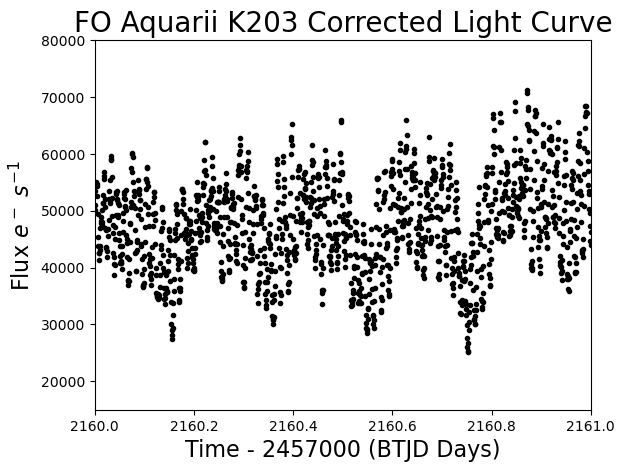

In [4]:
plt.errorbar(time0, flux0, yerr=flux_error0, fmt='k.')
plt.title('FO Aquarii K203 Corrected Light Curve', fontsize=20)
plt.xlabel('Time - 2457000 (BTJD Days)', fontsize=16)
plt.ylabel('Flux $e^-$ $s^{-1}$', fontsize=16)
plt.xlim(2160,2161)
plt.ylim(15000,80000)

Text(73, 0.03, '$\\omega$+$\\Omega$')

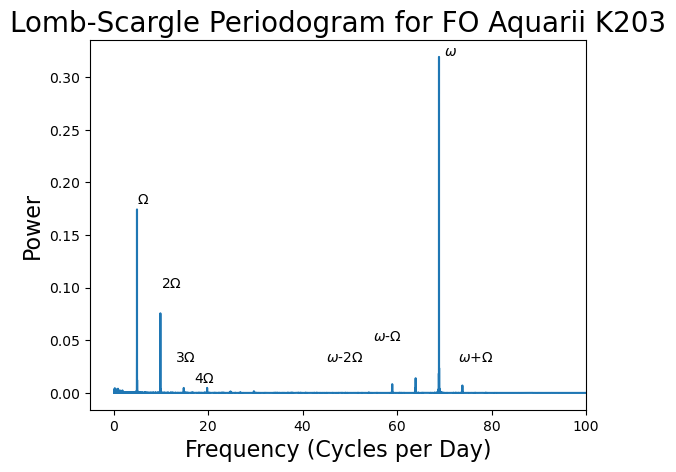

In [54]:
#Define frequency range
min_freq = 0.1  # Lower bound of frequencies
max_freq = 1 / (2 * np.median(np.diff(time0)))  # Nyquist frequency

frequencies01 = np.linspace(min_freq, max_freq, 1000000) 

power01 = LombScargle(time0, flux0).power(frequencies01)

plt.plot(frequencies01, power01)
plt.title('Lomb-Scargle Periodogram for FO Aquarii K203', fontsize=20)
plt.ylabel('Power', fontsize=16)
plt.xlabel('Frequency (Cycles per Day)', fontsize=16)
plt.xlim(-5, 100)
plt.text(70, 0.32, '$\omega$')
plt.text(5, 0.18, '$\Omega$')
plt.text(10, 0.1, '2$\Omega$')
plt.text(13, 0.03, '3$\Omega$')
plt.text(17, 0.01, '4$\Omega$')
plt.text(45, 0.03, '$\omega$-2$\Omega$')
plt.text(55, 0.05, '$\omega$-$\Omega$')
plt.text(73, 0.03, '$\omega$+$\Omega$')

In [6]:
fspin0 = frequencies01[np.argmax(power01)]
print(fspin0)

pspin0 = 1/fspin0
pspin0s = pspin0*u.day.to(u.s)
print(pspin0s)

min_freq = 0.1  # Lower bound of frequencies
max_freq = 50
frequencies02 = np.linspace(min_freq, max_freq, 1000000) 
power02 = LombScargle(time0, flux0).power(frequencies02)


forb0 = frequencies02[np.argmax(power02)]
print(forb0)

porb0 = 1/forb0
porb0h = porb0*u.day.to(u.hour)
print(porb0h)

68.88117899262635
1254.3339307425185
4.947690047690047
4.850748484377068


C:\Users\aisli\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\aisli\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'Flux $e^-$ $s^{-1}$')

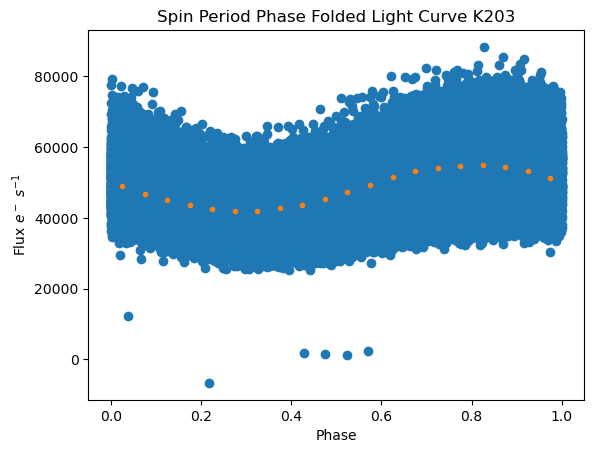

In [7]:
t0 = time0[0]

# Compute cycle number
n0 = (time0 - t0) / pspin0

# Compute new x-axis (integer cycles + phase)
spin_folded0 = (n0 % 1)

# Sort for smoother plotting
sorted_indices = np.argsort(spin_folded0)
spin_folded_sorted0 = spin_folded0[sorted_indices]
spin_flux_sorted0 = flux0[sorted_indices]

dphase = 0.05
temp_phase= np.arange(0,1.001,dphase)

for i,phi_i in enumerate(temp_phase):
    phase_filt = np.where((spin_folded_sorted0>=phi_i) & (spin_folded_sorted0<(phi_i+dphase)))
    median_phase = np.median(spin_folded_sorted0[phase_filt])
    median_flux = np.median(spin_flux_sorted0[phase_filt])
    
    plt.plot(median_phase,median_flux,'C1.')

plt.scatter(spin_folded_sorted0, spin_flux_sorted0)
plt.title('Spin Period Phase Folded Light Curve K203')
plt.xlabel('Phase')
plt.ylabel('Flux $e^-$ $s^{-1}$')
#plt.ylim(42000,58000)

     message: `xtol` termination condition is satisfied.
     success: True
      status: 3
         fun: [-5.308e+01  2.849e+01 ...  2.249e+02  2.813e+02]
           x: [ 4.385e+03  4.948e+00  1.002e-01  2.888e+03  4.773e+04]
        cost: 1636347846.855388
         jac: [[ 1.608e-02  4.722e+05 ... -1.074e-02  2.524e-02]
               [ 1.597e-02  4.926e+05 ... -9.954e-03  2.574e-02]
               ...
               [-2.344e-02 -2.731e+06 ...  3.052e-03  2.712e-02]
               [-2.409e-02 -2.751e+06 ...  1.937e-03  2.754e-02]]
        grad: [-1.632e+04 -1.083e+12 -4.156e+08 -6.025e+03  1.084e+03]
  optimality: 1082869340190.6316
 active_mask: [0 0 0 0 0]
        nfev: 30
        njev: None
   param_cov: [[ 3.019e-02 -2.965e-11 ... -8.399e-04  9.493e-04]
               [-2.965e-11  4.380e-17 ... -1.460e-11 -2.580e-12]
               ...
               [-8.399e-04 -1.460e-11 ...  3.055e-02  6.256e-04]
               [ 9.493e-04 -2.580e-12 ...  6.256e-04  1.537e-02]]
33054.193452285

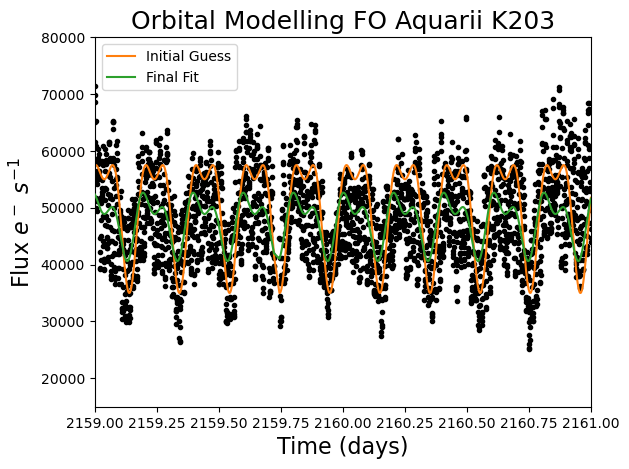

In [8]:
sine01 = models.Sine1D(amplitude=10000, frequency=4.947690047690047, phase=0)
sine02 = models.Sine1D(amplitude=5000, frequency=2*4.947690047690047, phase=0.25)
constant0 = models.Const1D(amplitude=50000)

fit_sin = fitting.LMLSQFitter(calc_uncertainties=True)

sin_init_orb0 = sine01 + sine02 + constant0

def tie_freq(model):
    return model.frequency_0 * 2

sine02.frequency.tied = tie_freq

def tie_phase(model):
    return model.phase_0 + 0.25

sine02.phase.tied = tie_phase

sin_final_orb0 = fit_sin(sin_init_orb0, time0, flux0, weights=1/flux_error0, maxiter=10000,acc=1e-10)

print(fit_sin.fit_info)

chi2_orb0 = np.sum(((sin_final_orb0(time0)-flux0)/flux_error0)**2)
chi2_r_orb0 = chi2_orb0/(len(time0)-3)
print(chi2_r_orb0)

pfit_orb0 = fit_sin.fit_info.x
pcov_orb0 = fit_sin.fit_info.param_cov * chi2_r_orb0
print(pcov_orb0)
error_orb0 = []

for i in range(len(pfit_orb0)):
    error_orb0.append(np.absolute(pcov_orb0[i][i])**0.5)
        
perr_leastsq_orb0 = np.array(error_orb0) 
        
print("Fit parameters and parameter errors from lestsq method :\ ")
print("pfit = \ ", pfit_orb0)
print("perr = \ ", perr_leastsq_orb0)

plt.errorbar(time0, flux0 ,flux_error0 ,fmt='k.', zorder=1),
plt.plot(time0 ,sin_init_orb0(time0),'C1', label='Initial Guess', zorder=2)
plt.plot(time0 ,sin_final_orb0(time0),'C2', label='Final Fit', zorder=3)
plt.xlabel('Time (days)', fontsize=16)
plt.ylabel('Flux $e^-$ $s^{-1}$', fontsize=16)
plt.title('Orbital Modelling FO Aquarii K203', fontsize=18)
plt.xlim(2159,2161)
plt.ylim(15000,80000)
plt.legend()
plt.show()

In [9]:
residual0 = flux0-sin_final_orb0(time0)

Text(0.5, 1.0, 'Residual Light Curve FO Aquarii K203')

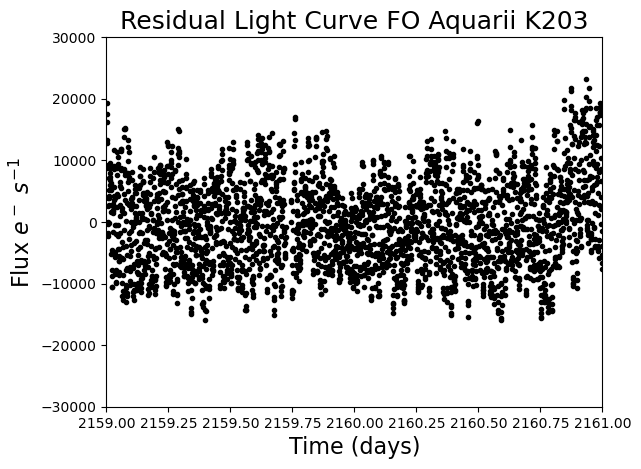

In [10]:
plt.errorbar(time0, residual0, yerr=flux_error0, fmt='k.')
plt.xlim(2159,2161)
plt.ylim(-30000, 30000)
plt.xlabel('Time (days)', fontsize=16)
plt.ylabel('Flux $e^-$ $s^{-1}$', fontsize=16)
plt.title('Residual Light Curve FO Aquarii K203', fontsize=18)

(-5.0, 200.0)

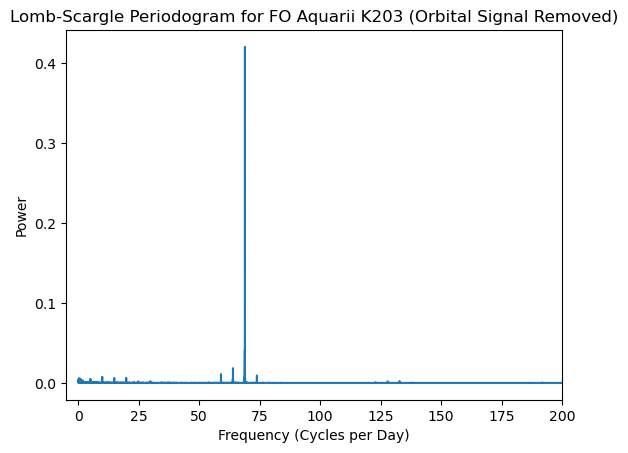

In [11]:
min_freq = 0.1  # Lower bound of frequencies
max_freq = 1 / (2 * np.median(np.diff(time0)))  # Nyquist frequency

frequencies03 = np.linspace(min_freq, max_freq, 1000000) 

power03 = LombScargle(time0, residual0).power(frequencies03)

plt.plot(frequencies03, power03)
plt.title('Lomb-Scargle Periodogram for FO Aquarii K203 (Orbital Signal Removed)')
plt.ylabel('Power')
plt.xlabel('Frequency (Cycles per Day)')
plt.xlim(-5, 200)

Text(0, 0.5, 'Flux $e^-$ $s^{-1}$')

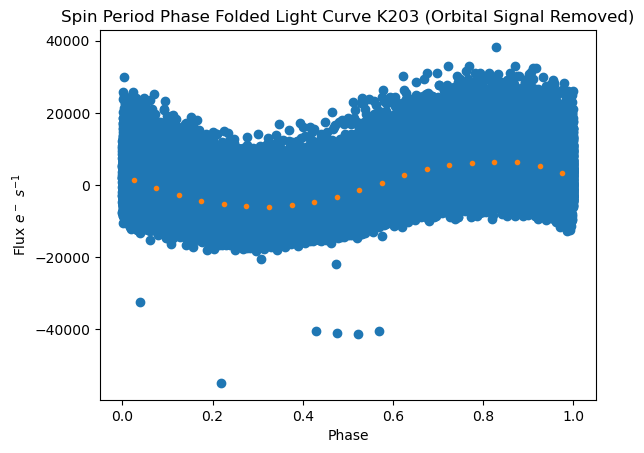

In [12]:
t0 = time0[0]

# Compute cycle number
n0 = (time0 - t0) / pspin0

# Compute new x-axis (integer cycles + phase)
spin_folded0 = (n0 % 1)

# Sort for smoother plotting
sorted_indices = np.argsort(spin_folded0)
spin_folded_sorted0 = spin_folded0[sorted_indices]
spin_flux_sorted0 = residual0[sorted_indices]

dphase = 0.05
temp_phase= np.arange(0,1.001,dphase)

for i,phi_i in enumerate(temp_phase):
    phase_filt = np.where((spin_folded_sorted0>=phi_i) & (spin_folded_sorted0<(phi_i+dphase)))
    median_phase = np.median(spin_folded_sorted0[phase_filt])
    median_flux = np.median(spin_flux_sorted0[phase_filt])
    
    plt.plot(median_phase,median_flux,'C1.')

plt.scatter(spin_folded_sorted0, spin_flux_sorted0)
plt.title('Spin Period Phase Folded Light Curve K203 (Orbital Signal Removed)')
plt.xlabel('Phase')
plt.ylabel('Flux $e^-$ $s^{-1}$')
#plt.ylim(42000,58000)

     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [-3.874e+00  3.022e+01 ...  1.530e+02  1.641e+02]
           x: [-6.489e+03  6.888e+01  9.159e-01]
        cost: 948733418.4143393
         jac: [[-7.583e-03 -2.105e+06 -9.816e+02]
               [-2.668e-04 -2.250e+06 -1.049e+03]
               ...
               [ 1.109e-02 -2.234e+06 -1.009e+03]
               [ 1.807e-02 -1.876e+06 -8.474e+02]]
        grad: [ 5.979e-05  4.340e+07  1.970e+04]
  optimality: 43401305.52856445
 active_mask: [0 0 0]
        nfev: 8
        njev: 7
   param_cov: [[ 3.062e-02 -5.730e-12  1.304e-08]
               [-5.730e-12  4.689e-14 -1.021e-10]
               [ 1.304e-08 -1.021e-10  2.224e-07]]
19164.395887573766
[[ 5.86832689e+02 -1.09809973e-07  2.49834797e-04]
 [-1.09809973e-07  8.98527736e-10 -1.95691777e-06]
 [ 2.49834797e-04 -1.95691777e-06  4.26235562e-03]]
Fit parameters and parameter errors from lestsq method :\ 
pfit = \  [-6.48928646e+0

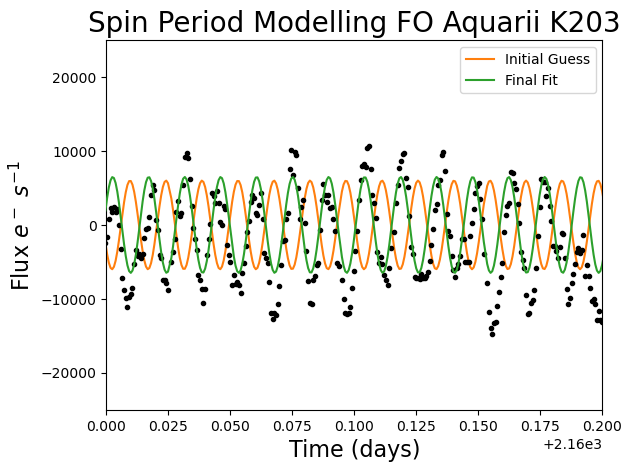

In [13]:
sine01 = models.Sine1D(amplitude=6000, frequency=68.88117899262635, phase=0.25)
sine02 = models.Sine1D(amplitude=5000, frequency=68.88117899262635-4.947690047690047, phase=0.25)

fit_sin = fitting.LMLSQFitter(calc_uncertainties=True)

sin_init_spin0 = sine01# + sine02

def tie_freq(model):
    return model.frequency_0 - 4.947690047690047

#sine02.frequency.tied = tie_freq

def tie_phase(model):
    return model.phase_0 + 0.25

#sine02.phase.tied = tie_phase

sin_final_spin0 = fit_sin(sin_init_spin0, time0, residual0, weights=1/flux_error0, maxiter=1000,acc=1e-10)

print(fit_sin.fit_info)

chi2_spin0 = np.sum(((sin_final_spin0(time0)-residual0)/flux_error0)**2)
chi2_r_spin0 = chi2_spin0/(len(time0)-3)
print(chi2_r_spin0)

pfit_spin0 = fit_sin.fit_info.x
pcov_spin0 = fit_sin.fit_info.param_cov * chi2_r_spin0
print(pcov_spin0)
error_spin0 = []

for i in range(len(pfit_spin0)):
    error_spin0.append(np.absolute(pcov_spin0[i][i])**0.5)
        
perr_leastsq_spin0 = np.array(error_spin0) 
        
print("Fit parameters and parameter errors from lestsq method :\ ")
print("pfit = \ ", pfit_spin0)
print("perr = \ ", perr_leastsq_spin0)

plt.errorbar(time0, residual0, flux_error0, fmt='k.', zorder=2),
plt.plot(time0, sin_init_spin0(time0),'C1', label='Initial Guess', zorder=1)
plt.plot(time0, sin_final_spin0(time0),'C2', label='Final Fit', zorder=3)
plt.xlabel('Time (days)', fontsize=16)
plt.ylabel('Flux $e^-$ $s^{-1}$', fontsize=16)
plt.title('Spin Period Modelling FO Aquarii K203', fontsize=20)
plt.legend()
plt.xlim(2160,2160.2)
plt.ylim(-25000, 25000)
plt.show()

In [14]:
pspin0_model = 1/pfit_spin0[1]
pspin0_models = pspin0_model*u.day.to(u.s)

pspin0_model_error = (1/pfit_spin0[1])*(perr_leastsq_spin0[1])
pspin0_model_errors = pspin0_model_error*u.day.to(u.s)

print(pspin0_models)
print(pspin0_model_errors)

1254.3397083765449
0.037599400004132026


## FO Aquarii 1

In [15]:
lc1 = np.genfromtxt("fo_aquarii1.csv", delimiter=",")
time1 = lc1[0]
flux1 = lc1[1]
flux_error1 = lc1[2]

(2465.0, 2466.0)

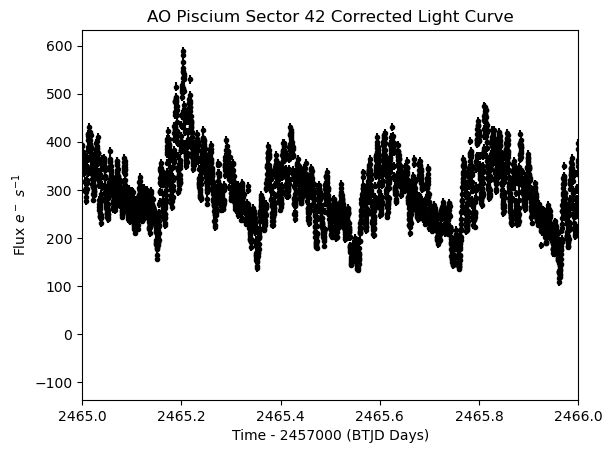

In [16]:
plt.errorbar(time1, flux1, yerr=flux_error1, fmt='k.')
plt.title('AO Piscium Sector 42 Corrected Light Curve')
plt.xlabel('Time - 2457000 (BTJD Days)')
plt.ylabel('Flux $e^-$ $s^{-1}$')
plt.xlim(2465,2466)

## FO Aquarii 2

In [17]:
lc2 = np.genfromtxt("fo_aquarii2.csv", delimiter=",")
time2 = lc2[0]
flux2 = lc2[1]
flux_error2 = lc2[2]

(2465.0, 2466.0)

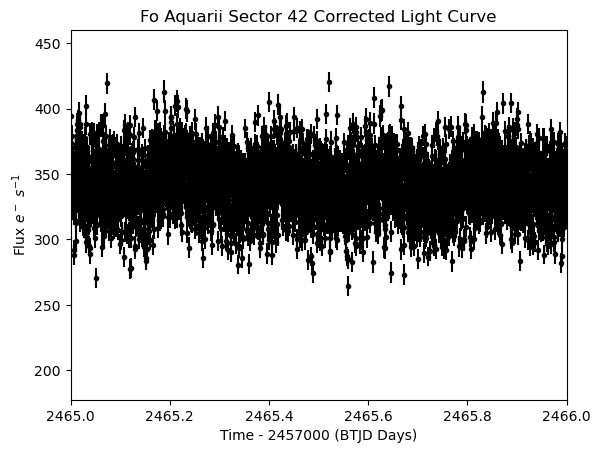

In [18]:
plt.errorbar(time2, flux2, yerr=flux_error2, fmt='k.')
plt.title('Fo Aquarii Sector 42 Corrected Light Curve')
plt.xlabel('Time - 2457000 (BTJD Days)')
plt.ylabel('Flux $e^-$ $s^{-1}$')
plt.xlim(2465,2466)

Text(73, 0.01, '$\\omega$+$\\Omega$')

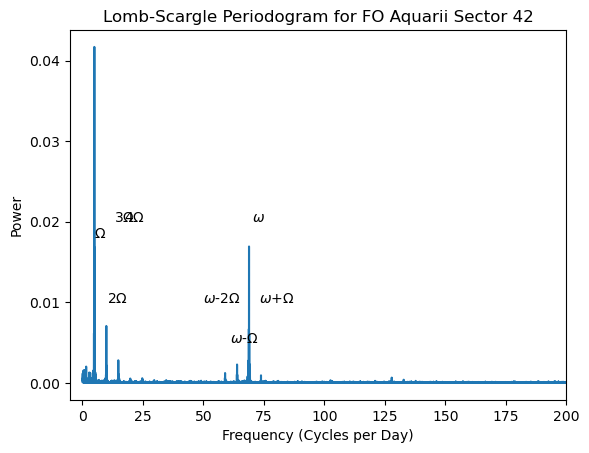

In [19]:
#Define frequency range
min_freq = 0.1  # Lower bound of frequencies
max_freq = 1 / (2 * np.median(np.diff(time2)))  # Nyquist frequency

frequencies21 = np.linspace(min_freq, max_freq, 1000000) 

power21 = LombScargle(time2, flux2).power(frequencies21)

plt.plot(frequencies21, power21)
plt.title('Lomb-Scargle Periodogram for FO Aquarii Sector 42')
plt.ylabel('Power')
plt.xlabel('Frequency (Cycles per Day)')
plt.xlim(-5, 200)
plt.text(70, 0.02, '$\omega$')
plt.text(5, 0.018, '$\Omega$')
plt.text(10, 0.01, '2$\Omega$')
plt.text(13, 0.02, '3$\Omega$')
plt.text(17, 0.02, '4$\Omega$')
plt.text(50, 0.01, '$\omega$-2$\Omega$')
plt.text(61, 0.005, '$\omega$-$\Omega$')
plt.text(73, 0.01, '$\omega$+$\Omega$')

In [20]:
forb2 = frequencies21[np.argmax(power21)]
print(forb2)

porb2 = 1/forb2
porb2h = porb2*u.day.to(u.hour)
print(porb2h)

min_freq = 50  # Lower bound of frequencies
max_freq = 1 / (2 * np.median(np.diff(time2)))  # Nyquist frequency
frequencies22 = np.linspace(min_freq, max_freq, 1000000) 
power22 = LombScargle(time2, flux2).power(frequencies22)


fspin2 = frequencies22[np.argmax(power22)]
print(fspin2)

pspin2 = 1/fspin2
pspin2s = pspin2*u.day.to(u.s)
print(pspin2s)

4.949080167723259
4.849385984192048
68.87858668589169
1254.381138713132


Text(0, 0.5, 'Flux $e^-$ $s^{-1}$')

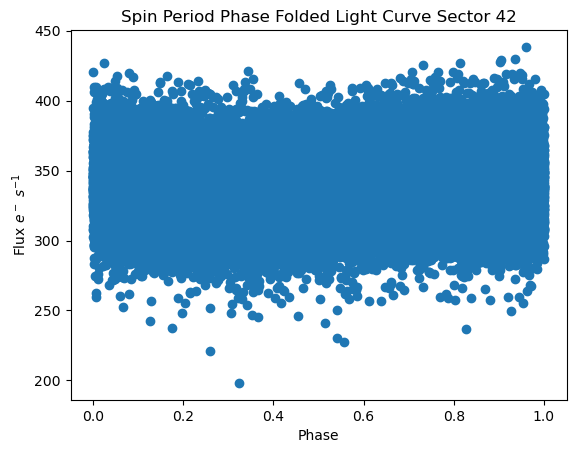

In [21]:
t2 = time2[0]

# Compute cycle number
n2 = (time2 - t2) / pspin2

# Compute new x-axis (integer cycles + phase)
spin_folded2 = (n2 % 1)

# Sort for smoother plotting
sorted_indices = np.argsort(spin_folded2)
spin_folded_sorted2 = spin_folded2[sorted_indices]
spin_flux_sorted2 = flux2[sorted_indices]

plt.scatter(spin_folded_sorted2, spin_flux_sorted2)
plt.title('Spin Period Phase Folded Light Curve Sector 42')
plt.xlabel('Phase')
plt.ylabel('Flux $e^-$ $s^{-1}$')

     message: `xtol` termination condition is satisfied.
     success: True
      status: 3
         fun: [-1.585e+00 -2.487e+00 ...  7.628e-01  5.562e+00]
           x: [ 1.500e+01  4.949e+00  5.000e-01  7.000e+00  3.400e+02]
        cost: 245845.93807084704
         jac: [[-6.951e-03 -2.511e+04 ... -1.238e-01  1.246e-01]
               [-7.838e-03 -2.474e+04 ... -1.235e-01  1.245e-01]
               ...
               [ 5.769e-02  3.733e+04 ... -3.960e-02  1.038e-01]
               [ 5.822e-02  3.728e+04 ... -3.816e-02  1.036e-01]]
        grad: [ 4.233e+03  3.429e+07  5.202e+04  2.599e+03 -4.056e+02]
  optimality: 34294996.38278849
 active_mask: [0 0 0 0 0]
        nfev: 40
        njev: None
   param_cov: [[ 2.123e-03 -3.321e-10 ...  5.189e-05  5.868e-05]
               [-3.321e-10  3.688e-13 ... -1.492e-10  3.064e-10]
               ...
               [ 5.189e-05 -1.492e-10 ...  2.123e-03  8.069e-06]
               [ 5.868e-05  3.064e-10 ...  8.069e-06  1.058e-03]]
8.2003314900215

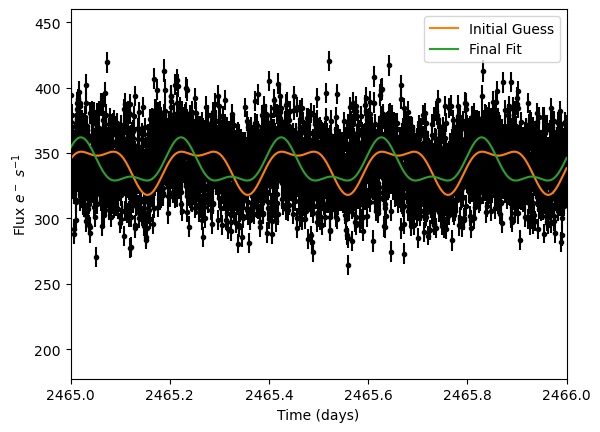

In [22]:
sine21 = models.Sine1D(amplitude=15, frequency=4.949080167723259, phase=0.5)
sine22 = models.Sine1D(amplitude=7, frequency=2*4.949080167723259, phase=0.25)
constant2 = models.Const1D(amplitude=340)

fit_sin = fitting.LMLSQFitter(calc_uncertainties=True)

sin_init_orb2 = sine21 + sine22 + constant2

def tie_freq(model):
    return model.frequency_0 * 2

sine22.frequency.tied = tie_freq

def tie_phase(model):
    return model.phase_0 + 0.25

sine22.phase.tied = tie_phase

sin_final_orb2 = fit_sin(sin_init_orb2, time2, flux2, weights=1/flux_error2, maxiter=10000,acc=1e-10)

print(fit_sin.fit_info)

chi2_orb2 = np.sum(((sin_final_orb2(time2)-flux2)/flux_error2)**2)
chi2_r_orb2 = chi2_orb2/(len(time2)-3)
print(chi2_r_orb2)

pfit_orb2 = fit_sin.fit_info.x
pcov_orb2 = fit_sin.fit_info.param_cov * chi2_r_orb2
print(pcov_orb2)
error_orb2 = []

for i in range(len(pfit_orb2)):
    error_orb2.append(np.absolute(pcov_orb2[i][i])**0.5)
        
perr_leastsq_orb2 = np.array(error_orb2) 
        
print("Fit parameters and parameter errors from lestsq method :\ ")
print("pfit = \ ", pfit_orb2)
print("perr = \ ", perr_leastsq_orb2)

plt.errorbar(time2, flux2, flux_error2, fmt='k.', zorder=1),
plt.plot(time2, sin_init_orb2(time2),'C1', label='Initial Guess', zorder=2)
plt.plot(time2, sin_final_orb2(time2),'C2', label='Final Fit', zorder=3)
plt.xlabel('Time (days)')
plt.ylabel('Flux $e^-$ $s^{-1}$')
plt.xlim(2465,2466)
plt.legend()
plt.show()

In [23]:
residual2 = flux2-sin_final_orb2(time2)

Text(0.5, 1.0, 'Residual Light Curve (Orbital Signal Removed) FO Aquarii Sector 42')

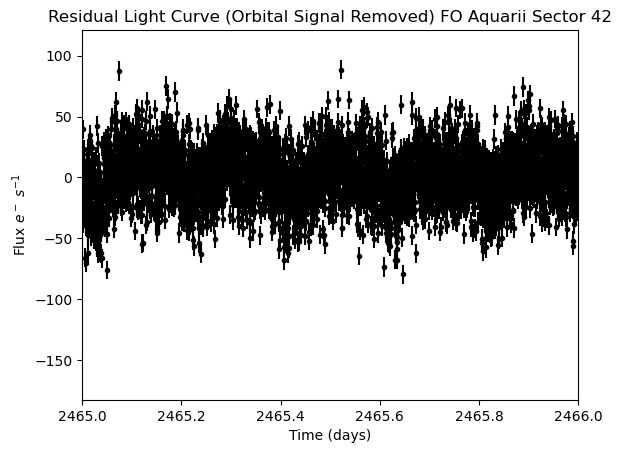

In [24]:
plt.errorbar(time2, residual2, yerr=flux_error2, fmt='k.')
plt.xlim(2465,2466)
plt.xlabel('Time (days)')
plt.ylabel('Flux $e^-$ $s^{-1}$')
plt.title('Residual Light Curve (Orbital Signal Removed) FO Aquarii Sector 42')

(-5.0, 200.0)

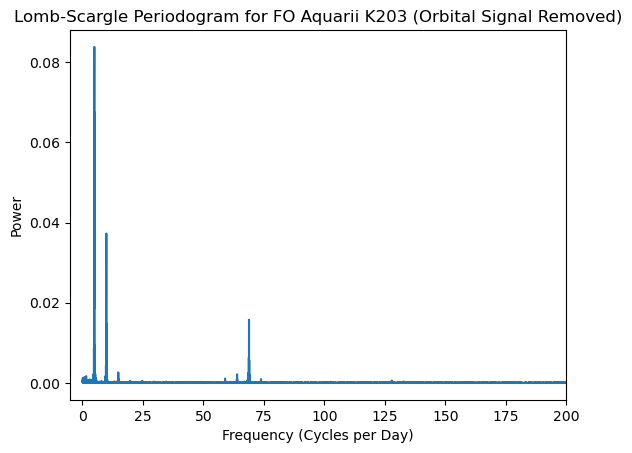

In [25]:
min_freq = 0.1  # Lower bound of frequencies
max_freq = 1 / (2 * np.median(np.diff(time0)))  # Nyquist frequency

frequencies23 = np.linspace(min_freq, max_freq, 1000000) 

power23 = LombScargle(time2, residual2).power(frequencies23)

plt.plot(frequencies23, power23)
plt.title('Lomb-Scargle Periodogram for FO Aquarii K203 (Orbital Signal Removed)')
plt.ylabel('Power')
plt.xlabel('Frequency (Cycles per Day)')
plt.xlim(-5, 200)

Text(0, 0.5, 'Flux $e^-$ $s^{-1}$')

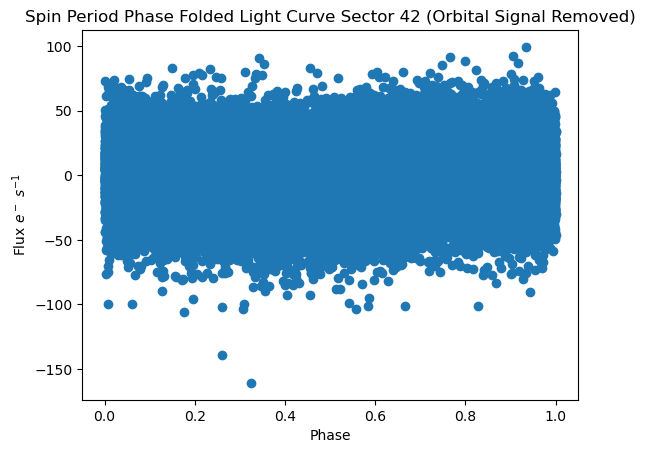

In [26]:
t2 = time2[0]

# Compute cycle number
n2 = (time2 - t2) / pspin2

# Compute new x-axis (integer cycles + phase)
spin_folded2 = (n2 % 1)

# Sort for smoother plotting
sorted_indices = np.argsort(spin_folded2)
spin_folded_sorted2 = spin_folded2[sorted_indices]
spin_flux_sorted2 = residual2[sorted_indices]

plt.scatter(spin_folded_sorted2, spin_flux_sorted2)
plt.title('Spin Period Phase Folded Light Curve Sector 42 (Orbital Signal Removed)')
plt.xlabel('Phase')
plt.ylabel('Flux $e^-$ $s^{-1}$')

     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [-1.347e+00 -2.294e+00 ...  1.144e+00  5.958e+00]
           x: [-3.994e+00  6.888e+01  2.848e+00]
        cost: 242074.89530630747
         jac: [[-5.963e-02 -6.718e+03 -2.745e+00]
               [-4.835e-02 -7.044e+03 -2.878e+00]
               ...
               [-9.553e-02  2.510e+03  1.016e+00]
               [-9.894e-02  1.902e+03  7.700e-01]]
        grad: [ 2.238e-04  2.718e+04  1.109e+01]
  optimality: 27180.563618368004
 active_mask: [0 0 0]
        nfev: 13
        njev: 12
   param_cov: [[ 2.115e-03  2.673e-09 -6.645e-06]
               [ 2.673e-09  5.777e-08 -1.422e-04]
               [-6.645e-06 -1.422e-04  3.499e-01]]
8.074546207682038
[[ 1.70762178e-02  2.15815531e-08 -5.36573954e-05]
 [ 2.15815531e-08  4.66444306e-07 -1.14789956e-03]
 [-5.36573954e-05 -1.14789956e-03  2.82495894e+00]]
Fit parameters and parameter errors from lestsq method :\ 
pfit = \  [-3.99376312

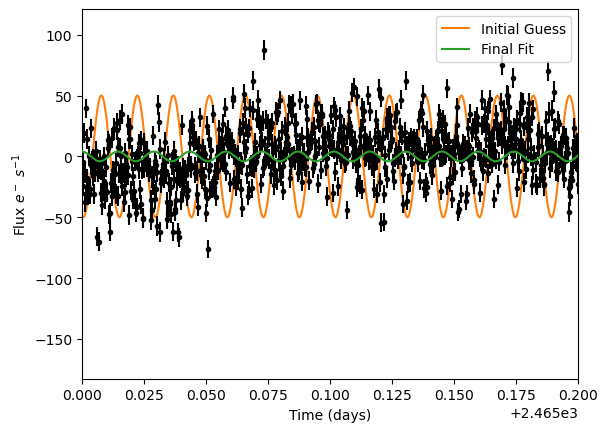

In [27]:
sine21 = models.Sine1D(amplitude=50, frequency=68.87858668589169, phase=0)
sine22 = models.Sine1D(amplitude=15, frequency=68.87858668589169-4.949080167723259, phase=0.25)

fit_sin = fitting.LMLSQFitter(calc_uncertainties=True)

sin_init_spin2 = sine21# + sine22

def tie_freq(model):
    return model.frequency_0 - 4.949080167723259

#sine22.frequency.tied = tie_freq

def tie_phase(model):
    return model.phase_0 + 0.25

#sine22.phase.tied = tie_phase

sin_final_spin2 = fit_sin(sin_init_spin2, time2, residual2, weights=1/flux_error2, maxiter=1000,acc=1e-10)
print(fit_sin.fit_info)

chi2_spin2 = np.sum(((sin_final_spin2(time2)-residual2)/flux_error2)**2)
chi2_r_spin2 = chi2_spin2/(len(time2)-3)
print(chi2_r_spin2)

pfit_spin2 = fit_sin.fit_info.x
pcov_spin2 = fit_sin.fit_info.param_cov * chi2_r_spin2
print(pcov_spin2)
error_spin2 = []

for i in range(len(pfit_spin2)):
    error_spin2.append(np.absolute(pcov_spin2[i][i])**0.5)
        
perr_leastsq_spin2 = np.array(error_spin2) 
        
print("Fit parameters and parameter errors from lestsq method :\ ")
print("pfit = \ ", pfit_spin2)
print("perr = \ ", perr_leastsq_spin2)

plt.errorbar(time2, residual2, flux_error2, fmt='k.', zorder=2),
plt.plot(time2, sin_init_spin2(time2),'C1', label='Initial Guess', zorder=1)
plt.plot(time2, sin_final_spin2(time2),'C2', label='Final Fit', zorder=3)
plt.xlabel('Time (days)')
plt.ylabel('Flux $e^-$ $s^{-1}$')
plt.legend()
plt.xlim(2465,2465.2)
plt.show()

In [28]:
pspin2_model = 1/pfit_spin2[1]
pspin2_models = pspin2_model*u.day.to(u.s)

pspin2_model_error = (1/pfit_spin2[1])*(perr_leastsq_spin2[1])
pspin2_model_errors = pspin2_model_error*u.day.to(u.s)

print(pspin2_models)
print(pspin2_model_errors)

1254.4018653273374
0.8567154304433126


## FO Aquarii 3

In [29]:
lc3 = np.genfromtxt("fo_aquarii3.csv", delimiter=",")
time3 = lc3[0]
flux3 = lc3[1]
flux_error3 = lc3[2]

(2450.0, 2451.0)

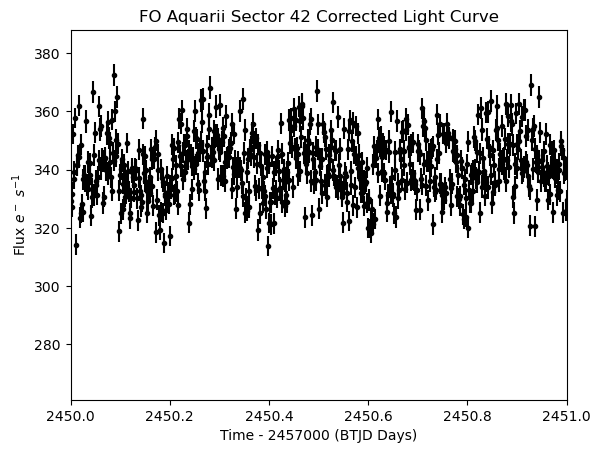

In [30]:
plt.errorbar(time3, flux3, yerr=flux_error3, fmt='k.')
plt.title('FO Aquarii Sector 42 Corrected Light Curve')
plt.xlabel('Time - 2457000 (BTJD Days)')
plt.ylabel('Flux $e^-$ $s^{-1}$')
plt.xlim(2450,2451)

Text(73, 0.01, '$\\omega$+$\\Omega$')

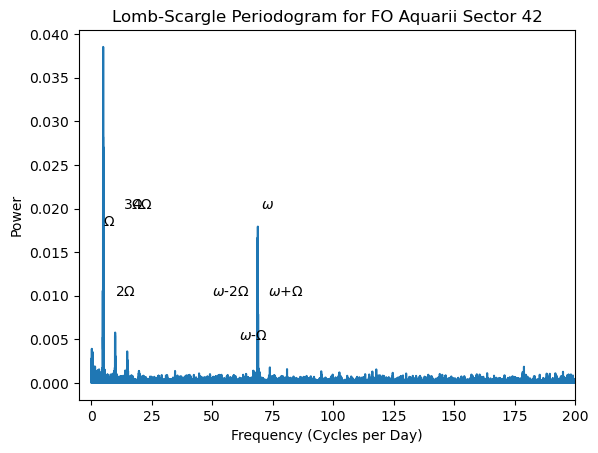

In [31]:
#Define frequency range
min_freq = 0.1  # Lower bound of frequencies
max_freq = 1 / (2 * np.median(np.diff(time3)))  # Nyquist frequency

frequencies31 = np.linspace(min_freq, max_freq, 1000000) 

power31 = LombScargle(time3, flux3).power(frequencies31)

plt.plot(frequencies31, power31)
plt.title('Lomb-Scargle Periodogram for FO Aquarii Sector 42')
plt.ylabel('Power')
plt.xlabel('Frequency (Cycles per Day)')
plt.xlim(-5, 200)
plt.text(70, 0.02, '$\omega$')
plt.text(5, 0.018, '$\Omega$')
plt.text(10, 0.01, '2$\Omega$')
plt.text(13, 0.02, '3$\Omega$')
plt.text(17, 0.02, '4$\Omega$')
plt.text(50, 0.01, '$\omega$-2$\Omega$')
plt.text(61, 0.005, '$\omega$-$\Omega$')
plt.text(73, 0.01, '$\omega$+$\Omega$')

In [32]:
forb3 = frequencies31[np.argmax(power31)]
print(forb3)

porb3 = 1/forb3
porb3h = porb3*u.day.to(u.hour)
print(porb3h)

min_freq = 50  # Lower bound of frequencies
max_freq = 1 / (2 * np.median(np.diff(time3)))  # Nyquist frequency
frequencies32 = np.linspace(min_freq, max_freq, 1000000) 
power32 = LombScargle(time3, flux3).power(frequencies32)


fspin3 = frequencies32[np.argmax(power32)]
print(fspin3)

pspin3 = 1/fspin3
pspin3s = pspin3*u.day.to(u.s)
print(pspin3s)

4.932486488247556
4.865700100179467
68.85748162553034
1254.7656109451061


Text(0, 0.5, 'Flux $e^-$ $s^{-1}$')

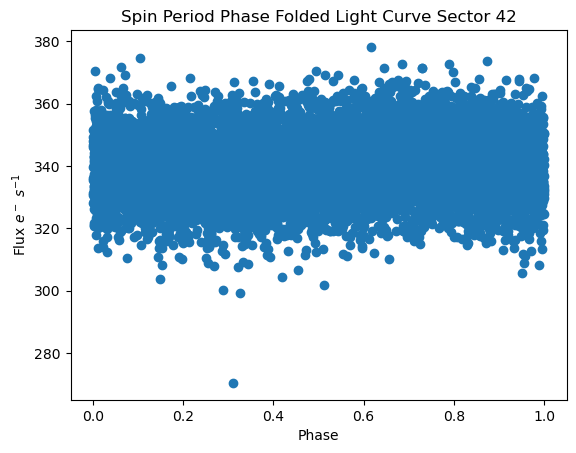

In [33]:
t3 = time3[0]

# Compute cycle number
n3 = (time3 - t3) / pspin3

# Compute new x-axis (integer cycles + phase)
spin_folded3 = (n3 % 1)

# Sort for smoother plotting
sorted_indices = np.argsort(spin_folded3)
spin_folded_sorted3 = spin_folded3[sorted_indices]
spin_flux_sorted3 = flux3[sorted_indices]

plt.scatter(spin_folded_sorted3, spin_flux_sorted3)
plt.title('Spin Period Phase Folded Light Curve Sector 42')
plt.xlabel('Phase')
plt.ylabel('Flux $e^-$ $s^{-1}$')

     message: `xtol` termination condition is satisfied.
     success: True
      status: 3
         fun: [-1.795e+00 -1.057e+00 ...  2.017e+00  6.594e-01]
           x: [ 2.218e+00  4.931e+00 -3.354e-01 -5.842e-01  3.398e+02]
        cost: 36115.048695054065
         jac: [[ 1.079e-02 -5.272e+03 ... -1.232e-01  2.780e-01]
               [-1.178e-03 -5.491e+03 ... -1.450e-01  2.797e-01]
               ...
               [-1.792e-01 -7.601e+03 ... -1.922e-01  2.406e-01]
               [-1.835e-01 -7.493e+03 ... -1.767e-01  2.375e-01]]
        grad: [-1.642e+02 -7.863e+06 -2.814e+03 -4.664e+01  1.091e+01]
  optimality: 7863432.255757787
 active_mask: [0 0 0 0 0]
        nfev: 40
        njev: None
   param_cov: [[ 2.513e-03 -2.016e-09 ... -3.024e-05  5.338e-06]
               [-2.016e-09  5.616e-11 ...  1.443e-09 -2.414e-09]
               ...
               [-3.024e-05  1.443e-09 ...  2.491e-03  1.176e-05]
               [ 5.338e-06 -2.414e-09 ...  1.176e-05  1.251e-03]]
7.0675242064685

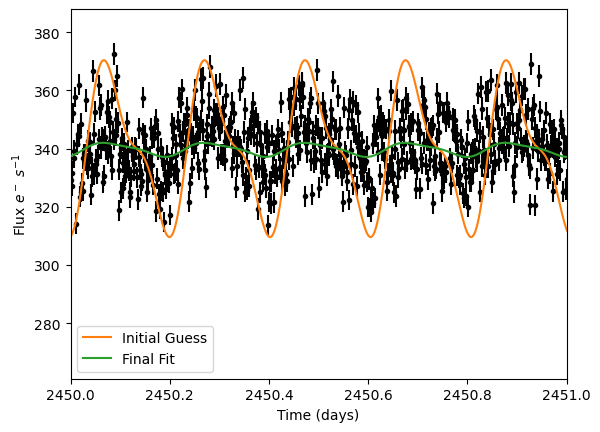

In [34]:
sine31 = models.Sine1D(amplitude=25, frequency=4.932486488247556, phase=0.25)
sine32 = models.Sine1D(amplitude=10, frequency=2*4.932486488247556, phase=0.5)
constant3 = models.Const1D(amplitude=340)

fit_sin = fitting.LMLSQFitter(calc_uncertainties=True)

sin_init_orb3 = sine31 + sine32 + constant3

def tie_freq(model):
    return model.frequency_0 * 2

sine32.frequency.tied = tie_freq

def tie_phase(model):
    return model.phase_0 + 0.25

sine32.phase.tied = tie_phase

sin_final_orb3 = fit_sin(sin_init_orb3, time3, flux3, weights=1/flux_error3, maxiter=10000,acc=1e-10)

print(fit_sin.fit_info)

chi2_orb3 = np.sum(((sin_final_orb3(time3)-flux3)/flux_error3)**2)
chi2_r_orb3 = chi2_orb3/(len(time3)-3)
print(chi2_r_orb3)

pfit_orb3 = fit_sin.fit_info.x
pcov_orb3 = fit_sin.fit_info.param_cov * chi2_r_orb3
print(pcov_orb3)
error_orb3 = []

for i in range(len(pfit_orb3)):
    error_orb3.append(np.absolute(pcov_orb3[i][i])**0.5)
        
perr_leastsq_orb3 = np.array(error_orb3) 
        
print("Fit parameters and parameter errors from lestsq method :\ ")
print("pfit = \ ", pfit_orb3)
print("perr = \ ", perr_leastsq_orb3)

plt.errorbar(time3, flux3, flux_error3, fmt='k.', zorder=1),
plt.plot(time3, sin_init_orb3(time3),'C1', label='Initial Guess', zorder=2)
plt.plot(time3, sin_final_orb3(time3),'C2', label='Final Fit', zorder=3)
plt.xlabel('Time (days)')
plt.ylabel('Flux $e^-$ $s^{-1}$')
plt.xlim(2450,2451)
plt.legend()
plt.show()

In [35]:
residual3 = flux3-sin_final_orb3(time3)

Text(0.5, 1.0, 'Residual Light Curve (Orbital Signal Removed) FO Aquarii Sector 42')

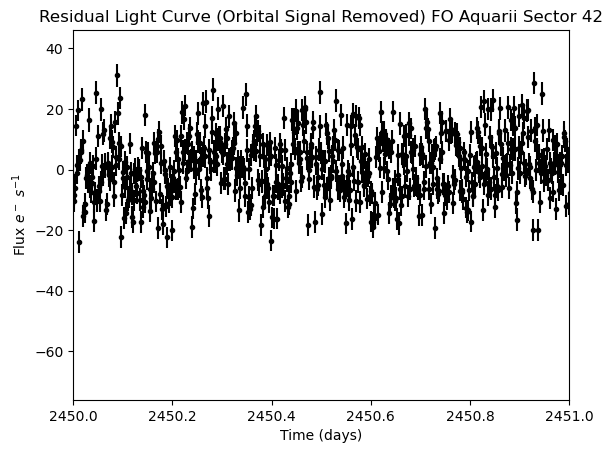

In [36]:
plt.errorbar(time3, residual3, yerr=flux_error3, fmt='k.')
plt.xlim(2450,2451)
plt.xlabel('Time (days)')
plt.ylabel('Flux $e^-$ $s^{-1}$')
plt.title('Residual Light Curve (Orbital Signal Removed) FO Aquarii Sector 42')

(-5.0, 200.0)

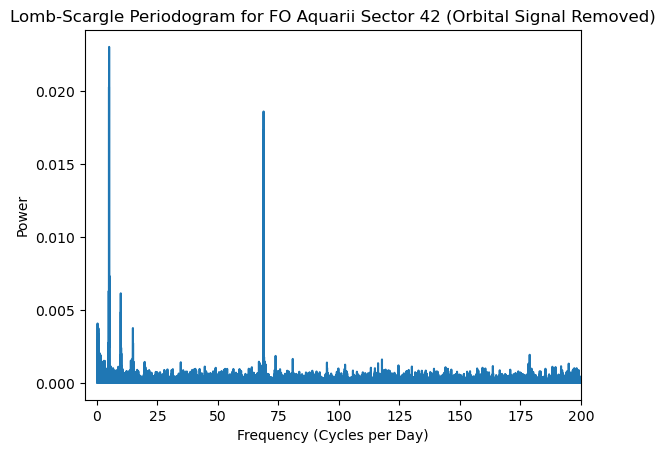

In [37]:
min_freq = 0.1  # Lower bound of frequencies
max_freq = 1 / (2 * np.median(np.diff(time3)))  # Nyquist frequency

frequencies32 = np.linspace(min_freq, max_freq, 1000000) 

power32 = LombScargle(time3, residual3).power(frequencies32)

plt.plot(frequencies32, power32)
plt.title('Lomb-Scargle Periodogram for FO Aquarii Sector 42 (Orbital Signal Removed)')
plt.ylabel('Power')
plt.xlabel('Frequency (Cycles per Day)')
plt.xlim(-5, 200)

     message: `xtol` termination condition is satisfied.
     success: True
      status: 3
         fun: [-1.575e+00 -1.087e+00 ...  2.239e+00  6.940e-01]
           x: [ 1.164e+00  6.886e+01  3.568e-01  4.186e-01]
        cost: 35651.302950053985
         jac: [[ 1.461e-01 -1.183e+02 -2.392e+00  1.178e-01]
               [-1.328e-02 -1.372e+02 -2.774e+00 -3.359e-02]
               ...
               [ 1.054e-01 -1.211e+02 -1.679e+00  2.378e-01]
               [-3.490e-02 -1.534e+02 -2.126e+00  1.798e-01]]
        grad: [-1.971e+02 -7.621e+03 -3.766e+02  1.803e+02]
  optimality: 7620.628532437688
 active_mask: [0 0 0 0]
        nfev: 34
        njev: None
   param_cov: [[ 2.502e-03  2.427e-07 -1.567e-05 -4.923e-05]
               [ 2.427e-07  7.292e-07 -4.568e-05 -8.383e-07]
               [-1.567e-05 -4.568e-05  2.902e-03  5.394e-05]
               [-4.923e-05 -8.383e-07  5.394e-05  2.499e-03]]
6.976771614491975
[[ 1.74532229e-02  1.69341657e-06 -1.09356550e-04 -3.43435324e-04]
 [ 1.

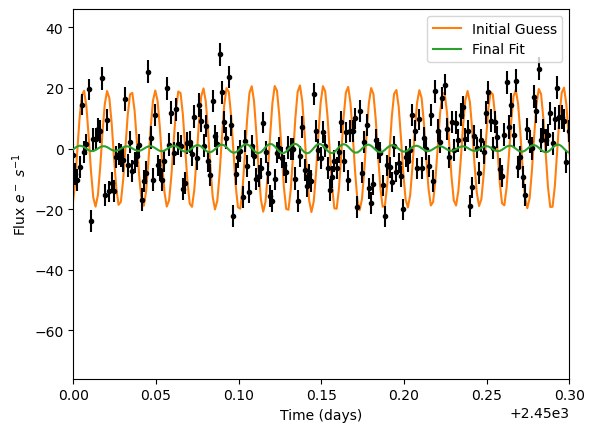

In [38]:
sine31 = models.Sine1D(amplitude=20, frequency=68.85748162553034, phase=0)
sine32 = models.Sine1D(amplitude=1, frequency=68.85748162553034-4.932486488247556, phase=0.25)

fit_sin = fitting.LMLSQFitter(calc_uncertainties=True)

sin_init_spin3 = sine31 + sine32

def tie_freq(model):
    return model.frequency_0 - 4.932486488247556

sine32.frequency.tied = tie_freq

def tie_phase(model):
    return model.phase_0 + 0.25

sine32.phase.tied = tie_phase

sin_final_spin3 = fit_sin(sin_init_spin3, time3, residual3, weights=1/flux_error3, maxiter=1000,acc=1e-10)

print(fit_sin.fit_info)

chi2_spin3 = np.sum(((sin_final_spin3(time3)-residual3)/flux_error3)**2)
chi2_r_spin3 = chi2_spin3/(len(time3)-3)
print(chi2_r_spin3)

pfit_spin3 = fit_sin.fit_info.x
pcov_spin3 = fit_sin.fit_info.param_cov * chi2_r_spin3
print(pcov_spin3)
error_spin3 = []

for i in range(len(pfit_spin3)):
    error_spin3.append(np.absolute(pcov_spin3[i][i])**0.5)
        
perr_leastsq_spin3 = np.array(error_spin3) 
        
print("Fit parameters and parameter errors from lestsq method :\ ")
print("pfit = \ ", pfit_spin3)
print("perr = \ ", perr_leastsq_spin3)

plt.errorbar(time3, residual3, flux_error3, fmt='k.', zorder=2),
plt.plot(time3, sin_init_spin3(time3),'C1', label='Initial Guess', zorder=1)
plt.plot(time3, sin_final_spin3(time3),'C2', label='Final Fit', zorder=3)
plt.xlabel('Time (days)')
plt.ylabel('Flux $e^-$ $s^{-1}$')
plt.legend()
plt.xlim(2450,2450.3)
plt.show()

Text(0, 0.5, 'Flux $e^-$ $s^{-1}$')

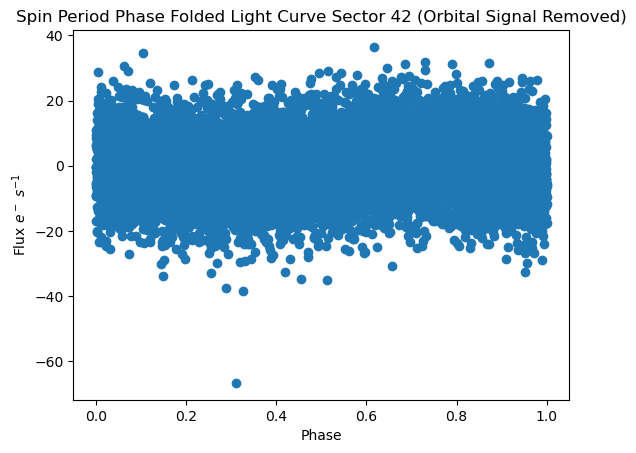

In [39]:
t3 = time3[0]

# Compute cycle number
n3 = (time3 - t3) / pspin3

# Compute new x-axis (integer cycles + phase)
spin_folded3 = (n3 % 1)

# Sort for smoother plotting
sorted_indices = np.argsort(spin_folded3)
spin_folded_sorted3 = spin_folded3[sorted_indices]
spin_flux_sorted3 = residual3[sorted_indices]

plt.scatter(spin_folded_sorted3, spin_flux_sorted3)
plt.title('Spin Period Phase Folded Light Curve Sector 42 (Orbital Signal Removed)')
plt.xlabel('Phase')
plt.ylabel('Flux $e^-$ $s^{-1}$')

In [40]:
pspin3_model = 1/pfit_spin3[1]
pspin3_models = pspin3_model*u.day.to(u.s)

pspin3_model_error = (1/pfit_spin3[1])*(perr_leastsq_spin3[1])
pspin3_model_errors = pspin3_model_error*u.day.to(u.s)

print(pspin3_models)
print(pspin3_model_errors)

1254.6553216046398
2.8299840845876942


## FO Aquarii 4

In [41]:
lc4 = np.genfromtxt("fo_aquarii4.csv", delimiter=",")
time4 = lc4[0]
flux4 = lc4[1]
flux_error4 = lc4[2]

(2465.0, 2466.0)

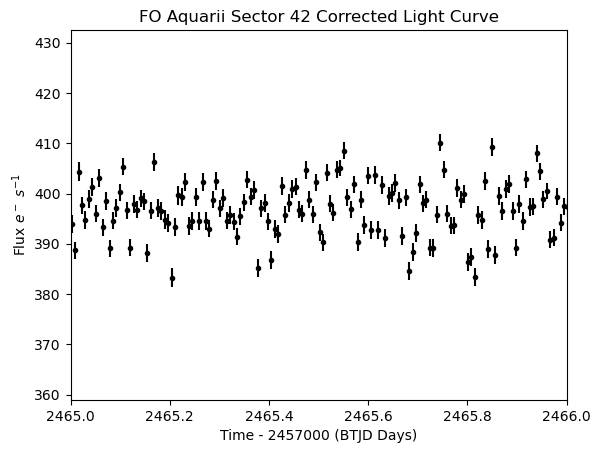

In [42]:
plt.errorbar(time4, flux4, yerr=flux_error4, fmt='k.')
plt.title('FO Aquarii Sector 42 Corrected Light Curve')
plt.xlabel('Time - 2457000 (BTJD Days)')
plt.ylabel('Flux $e^-$ $s^{-1}$')
plt.xlim(2465, 2466)

Text(73, 0.01, '$\\omega$+$\\Omega$')

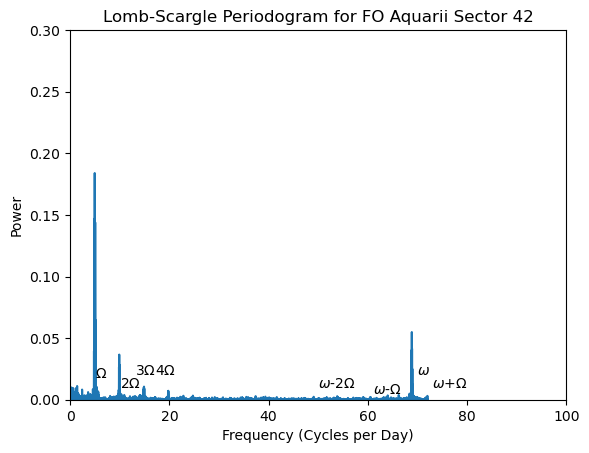

In [43]:
#Define frequency range
min_freq = 0.1  # Lower bound of frequencies
max_freq = 1 / (2 * np.median(np.diff(time4)))  # Nyquist frequency

frequencies41 = np.linspace(min_freq, max_freq, 1000000) 

power41 = LombScargle(time4, flux4).power(frequencies41)

plt.plot(frequencies41, power41)
plt.title('Lomb-Scargle Periodogram for FO Aquarii Sector 42')
plt.ylabel('Power')
plt.xlabel('Frequency (Cycles per Day)')
plt.xlim(0,100)
plt.ylim(0,0.3)
plt.text(70, 0.02, '$\omega$')
plt.text(5, 0.018, '$\Omega$')
plt.text(10, 0.01, '2$\Omega$')
plt.text(13, 0.02, '3$\Omega$')
plt.text(17, 0.02, '4$\Omega$')
plt.text(50, 0.01, '$\omega$-2$\Omega$')
plt.text(61, 0.005, '$\omega$-$\Omega$')
plt.text(73, 0.01, '$\omega$+$\Omega$')

In [44]:
forb4 = frequencies41[np.argmax(power41)]
print(forb4)

porb4 = 1/forb4
porb4h = porb4*u.day.to(u.hour)
print(porb4h)

min_freq = 50  # Lower bound of frequencies
max_freq = 100 
frequencies42 = np.linspace(min_freq, max_freq, 1000000) 
power42 = LombScargle(time4, flux4).power(frequencies42)


fspin4 = frequencies42[np.argmax(power42)]
print(fspin4)

pspin4 = 1/fspin4
pspin4s = pspin4*u.day.to(u.s)
print(pspin4s)

4.926756173953861
4.871359400101857
68.85486885486885
1254.8132243503721


Text(0, 0.5, 'Flux $e^-$ $s^{-1}$')

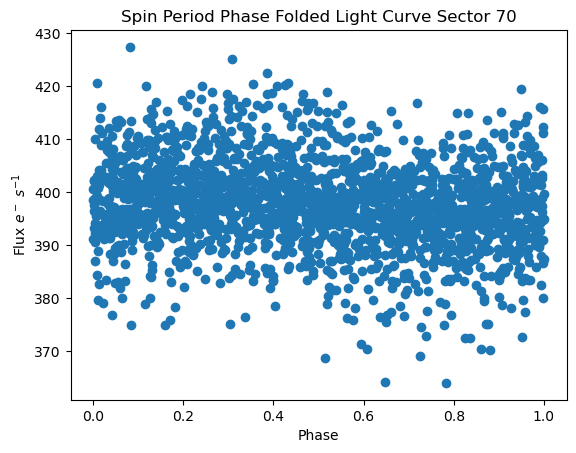

In [45]:
t4 = time4[0]

# Compute cycle number
n4 = (time4 - t4) / pspin4

# Compute new x-axis (integer cycles + phase)
spin_folded4 = (n4 % 1)

# Sort for smoother plotting
sorted_indices = np.argsort(spin_folded4)
spin_folded_sorted4 = spin_folded4[sorted_indices]
spin_flux_sorted4 = flux4[sorted_indices]

plt.scatter(spin_folded_sorted4, spin_flux_sorted4)
plt.title('Spin Period Phase Folded Light Curve Sector 70')
plt.xlabel('Phase')
plt.ylabel('Flux $e^-$ $s^{-1}$')

     message: `xtol` termination condition is satisfied.
     success: True
      status: 3
         fun: [ 3.327e+00 -1.974e+00 ...  3.729e+00 -9.197e-01]
           x: [ 4.460e+00  4.927e+00  1.443e-01  8.068e-01  3.978e+02]
        cost: 17474.789037774077
         jac: [[-1.902e-01 -3.216e+04 ...  5.446e-01  5.567e-01]
               [-2.993e-01 -3.398e+04 ...  5.466e-01  5.602e-01]
               ...
               [-8.452e-02 -2.547e+04 ...  4.001e-01  4.672e-01]
               [-1.835e-01 -2.809e+04 ...  4.718e-01  4.748e-01]]
        grad: [-1.493e+02 -7.827e+05  5.813e+02  7.248e+01 -1.566e+00]
  optimality: 782689.5335626779
 active_mask: [0 0 0 0 0]
        nfev: 41
        njev: None
   param_cov: [[ 3.146e-03 -7.032e-10 ...  2.255e-05 -5.563e-06]
               [-7.032e-10  3.558e-11 ... -5.955e-10 -2.061e-09]
               ...
               [ 2.255e-05 -5.955e-10 ...  3.126e-03 -6.642e-06]
               [-5.563e-06 -2.061e-09 ... -6.642e-06  1.565e-03]]
17.132146115464

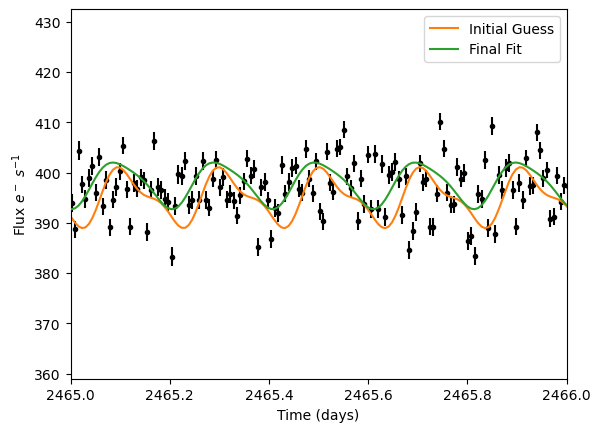

In [46]:
sine41 = models.Sine1D(amplitude=5, frequency=4.926756173953861, phase=0.25)
sine42 = models.Sine1D(amplitude=2, frequency=2*4.926756173953861, phase=0.5)
constant4 = models.Const1D(amplitude=395)

fit_sin = fitting.LMLSQFitter(calc_uncertainties=True)

sin_init_orb4 = sine41 + sine42 + constant4

def tie_freq(model):
    return model.frequency_0 * 2

sine42.frequency.tied = tie_freq

def tie_phase(model):
    return model.phase_0 + 0.25

sine42.phase.tied = tie_phase

sin_final_orb4 = fit_sin(sin_init_orb4, time4, flux4, weights=1/flux_error4, maxiter=10000,acc=1e-10)

print(fit_sin.fit_info)

chi2_orb4 = np.sum(((sin_final_orb4(time4)-flux4)/flux_error4)**2)
chi2_r_orb4 = chi2_orb4/(len(time4)-3)
print(chi2_r_orb4)

pfit_orb4 = fit_sin.fit_info.x
pcov_orb4 = fit_sin.fit_info.param_cov * chi2_r_orb4
print(pcov_orb4)
error_orb4 = []

for i in range(len(pfit_orb4)):
    error_orb4.append(np.absolute(pcov_orb4[i][i])**0.5)
        
perr_leastsq_orb4 = np.array(error_orb4) 
        
print("Fit parameters and parameter errors from lestsq method :\ ")
print("pfit = \ ", pfit_orb4)
print("perr = \ ", perr_leastsq_orb4)

plt.errorbar(time4, flux4, flux_error4, fmt='k.', zorder=1),
plt.plot(time4, sin_init_orb4(time4),'C1', label='Initial Guess', zorder=2)
plt.plot(time4, sin_final_orb4(time4),'C2', label='Final Fit', zorder=3)
plt.xlabel('Time (days)')
plt.ylabel('Flux $e^-$ $s^{-1}$')
plt.xlim(2465, 2466)
plt.legend()
plt.show()

In [47]:
residual4 = flux4-sin_final_orb4(time4)

Text(0.5, 1.0, 'Residual Light Curve (Orbital Signal Removed) AO Piscium Sector 70')

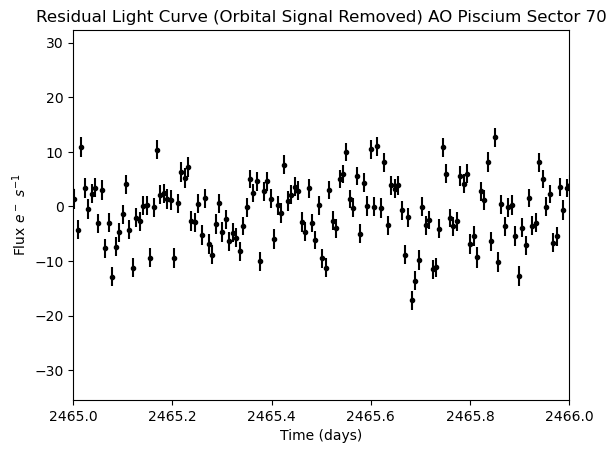

In [48]:
plt.errorbar(time4, residual4, yerr=flux_error4, fmt='k.')
plt.xlim(2465, 2466)
plt.xlabel('Time (days)')
plt.ylabel('Flux $e^-$ $s^{-1}$')
plt.title('Residual Light Curve (Orbital Signal Removed) AO Piscium Sector 70')

(0.0, 100.0)

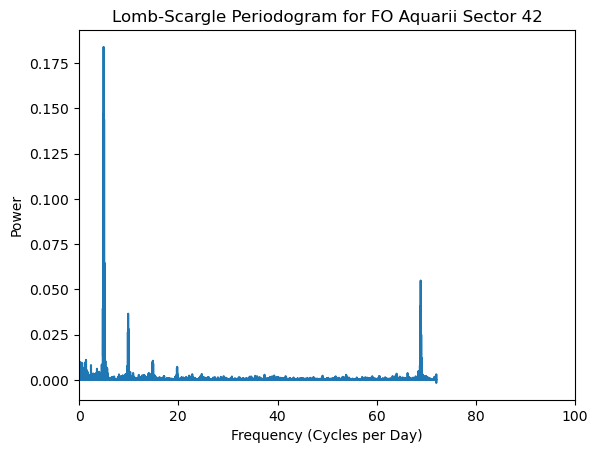

In [49]:
#Define frequency range
min_freq = 0.1  # Lower bound of frequencies
max_freq = 1 / (2 * np.median(np.diff(time4)))  # Nyquist frequency

frequencies43 = np.linspace(min_freq, max_freq, 1000000) 

power43 = LombScargle(time4, flux4).power(frequencies43)

plt.plot(frequencies43, power43)
plt.title('Lomb-Scargle Periodogram for FO Aquarii Sector 42')
plt.ylabel('Power')
plt.xlabel('Frequency (Cycles per Day)')
plt.xlim(0,100)

     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 3.167e+00 -1.612e+00 ...  2.684e+00  2.266e-01]
           x: [-2.664e+00  6.885e+01  3.989e-01]
        cost: 16341.358237229557
         jac: [[ 6.008e-02  2.268e+04  9.265e+00]
               [-1.360e-01 -2.226e+04 -9.096e+00]
               ...
               [ 3.924e-01  1.049e+04  4.246e+00]
               [-4.303e-01 -8.303e+03 -3.361e+00]]
        grad: [ 1.889e-05  3.012e+03  1.234e+00]
  optimality: 3012.237179785967
 active_mask: [0 0 0]
        nfev: 16
        njev: 14
   param_cov: [[ 3.131e-03  8.381e-08 -2.066e-04]
               [ 8.381e-08  1.929e-07 -4.748e-04]
               [-2.066e-04 -4.748e-04  1.168e+00]]
16.020939448264272
[[ 5.01594767e-02  1.34264736e-06 -3.30991609e-03]
 [ 1.34264736e-06  3.09066112e-06 -7.60613922e-03]
 [-3.30991609e-03 -7.60613922e-03  1.87189421e+01]]
Fit parameters and parameter errors from lestsq method :\ 
pfit = \  [-2.66404591

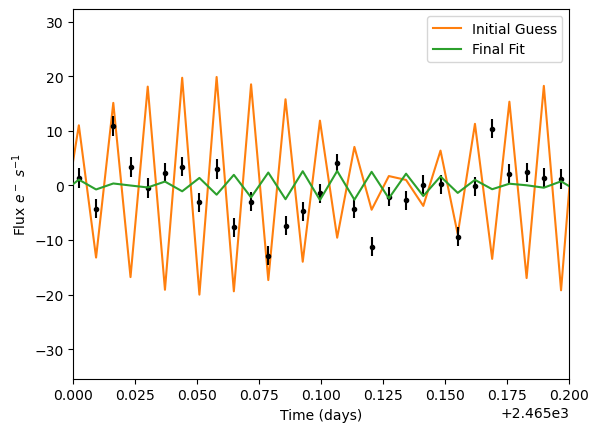

In [50]:
sine41 = models.Sine1D(amplitude=20, frequency=68.85486885486885, phase=0)
sine42 = models.Sine1D(amplitude=1, frequency=68.85486885486885-4.926756173953861, phase=0.25)

fit_sin = fitting.LMLSQFitter(calc_uncertainties=True)

sin_init_spin4 = sine41# + sine42

def tie_freq(model):
    return model.frequency_0 -4.926756173953861

sine42.frequency.tied = tie_freq

def tie_phase(model):
    return model.phase_0 + 0.25

sine42.phase.tied = tie_phase

sin_final_spin4 = fit_sin(sin_init_spin4, time4, residual4, weights=1/flux_error4, maxiter=1000,acc=1e-10)

print(fit_sin.fit_info)

chi2_spin4 = np.sum(((sin_final_spin4(time4)-residual4)/flux_error4)**2)
chi2_r_spin4 = chi2_spin4/(len(time4)-3)
print(chi2_r_spin4)

pfit_spin4 = fit_sin.fit_info.x
pcov_spin4 = fit_sin.fit_info.param_cov * chi2_r_spin4
print(pcov_spin4)
error_spin4 = []

for i in range(len(pfit_spin4)):
    error_spin4.append(np.absolute(pcov_spin4[i][i])**0.5)
        
perr_leastsq_spin4 = np.array(error_spin4) 
        
print("Fit parameters and parameter errors from lestsq method :\ ")
print("pfit = \ ", pfit_spin4)
print("perr = \ ", perr_leastsq_spin4)

plt.errorbar(time4, residual4, flux_error4, fmt='k.', zorder=2),
plt.plot(time4, sin_init_spin4(time4),'C1', label='Initial Guess', zorder=1)
plt.plot(time4, sin_final_spin4(time4),'C2', label='Final Fit', zorder=3)
plt.xlabel('Time (days)')
plt.ylabel('Flux $e^-$ $s^{-1}$')
plt.legend()
plt.xlim(2465, 2465.2)
plt.show()

In [51]:
pspin4_model = 1/pfit_spin4[1]
pspin4_models = pspin4_model*u.day.to(u.s)

pspin4_model_error = (1/pfit_spin4[1])*(perr_leastsq_spin4[1])
pspin4_model_errors = pspin4_model_error*u.day.to(u.s)

print(pspin4_models)
print(pspin4_model_errors)

1254.815000113555
2.2059994300812087


## Data Yurt

In [52]:
data.loc["Orbital Frequency (days⁻¹)", :] = [forb0, np.nan, forb2, forb3, forb4]
data.loc["Orbital Period (hours)", :] = [porb0h, np.nan, porb2h, porb3h, porb4h]
data.loc["Spin Frequency (days⁻¹)", :] = [fspin0, np.nan, fspin2, fspin3, fspin4]
data.loc["Spin Period (seconds)", :] = [pspin0s, np.nan, pspin2s, pspin3s, pspin4s]
data.loc["Model Spin Period (seconds)", :] = [pspin0_models, np.nan, pspin2_models, pspin3_models, pspin4_models]
data.loc["Model Spin Period Error (seconds)", :] = [pspin0_model_errors, np.nan, pspin2_model_errors, pspin3_model_errors, pspin4_model_errors]
data.loc["Model Spin Period Reduced χ2", :] = [chi2_r_spin0, np.nan, chi2_r_spin2, chi2_r_spin3, chi2_r_spin4]
print(data)

                                        0: K203  1: K203  2: Sector42  \
Orbital Frequency (days⁻¹)             4.947690      NaN     4.949080   
Orbital Period (hours)                 4.850748      NaN     4.849386   
Spin Frequency (days⁻¹)               68.881179      NaN    68.878587   
Spin Period (seconds)               1254.333931      NaN  1254.381139   
Model Spin Period (seconds)         1254.339708      NaN  1254.401865   
Model Spin Period Error (seconds)      0.037599      NaN     0.856715   
Model Spin Period Reduced χ2       19164.395888      NaN     8.074546   

                                   3: Sector42  4: Sector742  
Orbital Frequency (days⁻¹)            4.932486      4.926756  
Orbital Period (hours)                4.865700      4.871359  
Spin Frequency (days⁻¹)              68.857482     68.854869  
Spin Period (seconds)              1254.765611   1254.813224  
Model Spin Period (seconds)        1254.655322   1254.815000  
Model Spin Period Error (seconds)    

In [53]:
data.to_csv("FO_Aquarii_Spin_Periods.csv")